# First Steps with CAQL

## Adding CAQL Datapoint to Graphs

In order to add a CAQL Datapoint to a graph the following steps have to be taken:

1. Menu Analytics>Graphs
2. Click [New+]
3. Enter Title. Click [Save]
4. Click [CAQL]
5. Expand Datapoint with [v]
6. Select the query field (showing an error).
7. Enter Query (with tooltip)  
8. Deselect with [tab] to show results  

The following figure illustrates the required steps:

![](img/caql_graph.collage.png)

This process is a little tedious. There are a number of improvements that could be taken:
    
- **TODO:** Make CAQL driven graphs a first-class concept, that is available from the Analytics menu ("CAQL Explorer")
  All other datapoints classes: Metric, Metriccluster, Guide, Composite are covered by CAQL as well.
- **TODO:** Don't show an error for empty queries. Just a hint? or silently return nils.
- ~~**TODO:** Make the query field larger.~~
- ~~**TODO:** Make that tooltip permanent~~
- ~~**TODO:** Make a submit query button. [Shift Enter].~~


## Using CAQL via the API / Python

We make use of the Python Data Fetching API for illustration purposes.
For more details on how to use the API see the Appendix to this Document.
Everything we do here can also be done with CAQL in Circonus and Grafana/IRONdb graphs.
The primary reason for doing so here, is so that I don't have manage so many screenshots.

In [1]:
%run preamble.py
%matplotlib inline

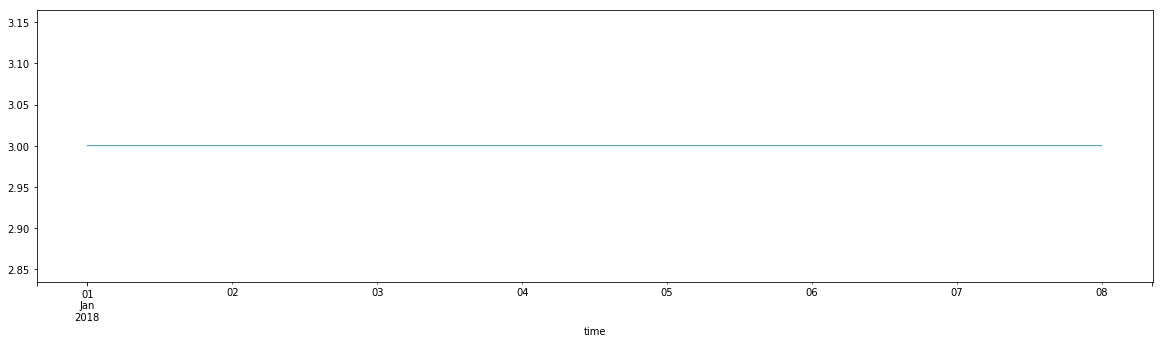

In [5]:
caql_plot("demo", """

1+2

""", datetime(2018,1,1), 60, 60*24*7);

## Creating CAQL Checks

Before creating a CAQL check you want to make sure you have created CAQL query is syntactically correct and works as expected on historic data.

In order to create a CAQL check the following steps are involved.

1. Select Integrations > Checks from the Menu
2. Click [New+] to create a new Check
3. Select [CAQL (BETA)]
4. Click [Configure Check]
5. Paste the CAQL query into the input field. Click [Test Check].
6. Rename the check if needed. Click [Finish].  
   Now the CAQL Check is created. The following steps ensure everything works as expected.
7. Click [View Check]
8. Click [View] for one of the output metrics.

Once the CAQL Check is created two things will happen:

1. The caql-broker will start evaluating the CAQL check as a standing query against incoming data.
   The results should become visible in the next 2-3 minutes.
   
2. A backfill job is kicked off that will populate the last 30 days (by default) with computed CAQL data.
   The results should become visibile in the next 1-2 minutes.
   
**CAVEAT:** There might be a tiny gap (1-2 Minutes) between the backfilled an the newly arrived data.

![](img/caql_check.collage.png)

Ideally we would have a button: Create CAQL check, available from the general CAQL query editor ("CAQL Explorer").

The following incremental improvements could be made to the check creation process:

- **TODO:** Get rid of step 4.
- **TODO:** Make sure metric values make it to the Checks page.
- **TODO:** Improve the Query Editor. We should show a preview of the results.

## Alerting on CAQL Statements

Alerting on CAQL statements can be realized using CAQL Checks.
CAQL Checks emit metrics into the system that can be used for alerting.

So for example, if you whish to alert when the disk is going to be full in 3 days time:

1. Create a CAQL statement that forecasts the metric you are interested in, e.g.
   ```
   metric:average(<uuid>,"df`/`percent_full") | forcasting:slope(1h, 3d)
   ```

2. Create a CAQL check for that CAQL statment.

3. Set an appropriate threshold-based alerting rule, e.g. when `output[1] > 100`

There is nothing special about creating the alerting rule. The steps look as follows:

1. Click Menu > Set Rules on the Metrics page.
2. Click Menua > Add Rule
3. Enter threshold information

![](img/caql_rules.collage.png)